# Example on how to convert hexagonal cameras into square grid and back to hex

In [24]:
from ctapipe.utils import get_dataset
from ctapipe.image.geometry_converter import convert_geometry_hex1d_to_rect2d, convert_geometry_rect2d_back_to_hexe1d
from ctapipe.visualization import CameraDisplay
from ctapipe.io.eventsourcefactory import event_source
import copy
import matplotlib.pyplot as plt

In [4]:
filename = get_dataset('gamma_test.simtel.gz')

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/ipykernel_launcher.py:1: AstropyDeprecationWarning: use get_dataset_path instead
  """Entry point for launching an IPython kernel.


In [5]:
source = event_source(filename)
source.allowed_tels = {1}

In [11]:
events = [copy.deepcopy(event) for event in source]

In [12]:
event = events[0]

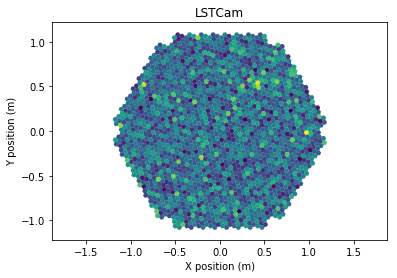

In [22]:
camera = event.inst.subarray.tel[1].camera
image = event.r0.tel[1].image[0]
CameraDisplay(camera, image)

## Conversion into square geometry

**A key must be speficied to be able to convert back to hexagonal afterwards**   
The conversion geometry is stored in `ctapipe.image.geometry_convert.rot_buffer`

In [26]:
key = 0
square_geom, square_image = convert_geometry_hex1d_to_rect2d(camera, image, key=key)

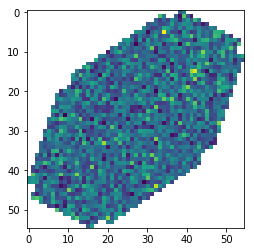

In [27]:
plt.imshow(square_image)

## Conversion back to hexagonal geometry

In [29]:
hex_geom, hex_image = convert_geometry_rect2d_back_to_hexe1d(square_geom, square_image, key=key)

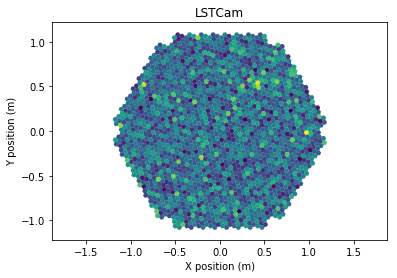

In [30]:
CameraDisplay(hex_geom, hex_image)

Let's check that the images are exactly the same:

In [31]:
assert (hex_image == image).all()

In [32]:
assert hex_geom == camera